# 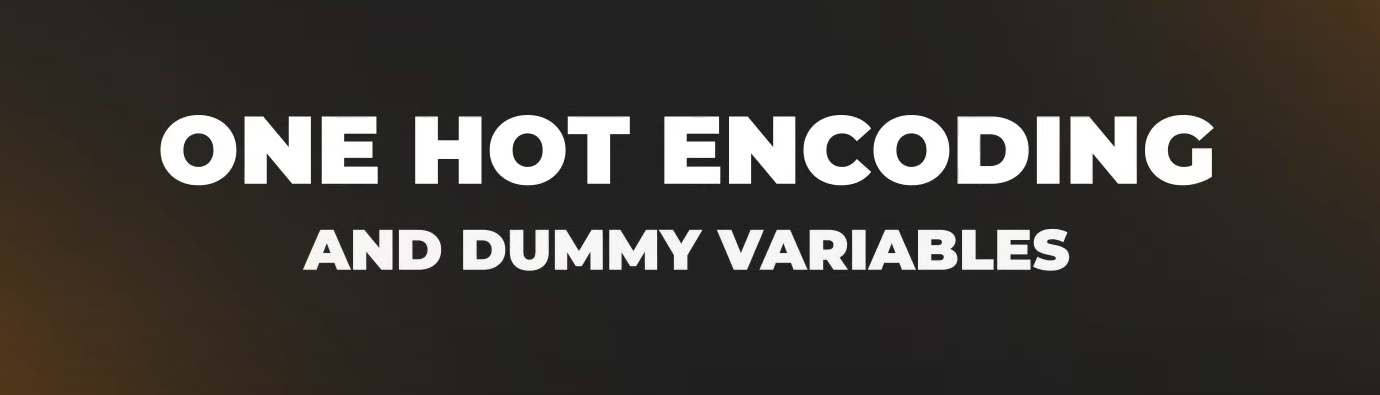

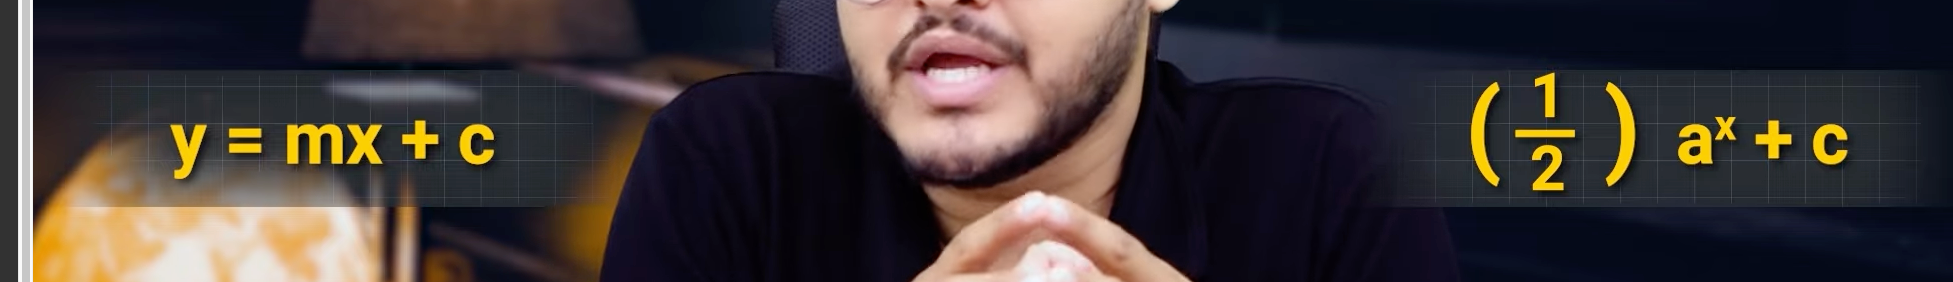

In [1]:
# Importing the Pandas library as pd
import pandas as pd

# Importing the Seaborn library as sns
import seaborn as sns

# Importing the Matplotlib library for plotting
import matplotlib.pyplot as plt

# Reading the CSV file "loan.csv" into a DataFrame named df
df = pd.read_csv("loan.csv")

# Displaying the first three rows of the DataFrame
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [2]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
# Filling missing values in the 'Gender' column with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Filling missing values in the 'Married' column with the mode
df['Married'].fillna(df['Married'].mode()[0], inplace=True)


<ipython-input-3-6469af7261ac>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
<ipython-input-3-6469af7261ac>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [4]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# ONE HOT ENCODING
## get_dummies()

In [5]:
# Creating a new DataFrame 'en_data' with selected columns 'Gender' and 'Married' from the original DataFrame
en_data = df[['Gender', 'Married']]
en_data.head()


,Gender,Married
0,Male,No
1,Male,Yes
2,Male,Yes
3,Male,Yes
4,Male,No


In [6]:
# Creating dummy variables for categorical columns in 'en_data'
pd.get_dummies(en_data)


,Gender_Female,Gender_Male,Married_No,Married_Yes
0,False,True,True,False
1,False,True,False,True
2,False,True,False,True
3,False,True,False,True
4,False,True,True,False
...,...,...,...,...
609,True,False,True,False
610,False,True,False,True
611,False,True,False,True
612,False,True,False,True


In [7]:
# Displaying information about the DataFrame after one-hot encoding
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    bool 
 1   Gender_Male    614 non-null    bool 
 2   Married_No     614 non-null    bool 
 3   Married_Yes    614 non-null    bool 
dtypes: bool(4)
memory usage: 2.5 KB


In [8]:
# Importing the OneHotEncoder from scikit-learn
from sklearn.preprocessing import OneHotEncoder

# Creating an instance of OneHotEncoder with drop parameter set to "first"
ohe = OneHotEncoder(drop="first")

# Applying OneHotEncoder to transform 'en_data' and converting the result to a NumPy array
arr = ohe.fit_transform(en_data).toarray()

# Displaying the resulting NumPy array
arr


array([[1., 0.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [0., 0.]])

In [9]:
# Creating a new DataFrame from the one-hot encoded array with specified column names
df_encoded = pd.DataFrame(arr, columns=['Gender_Male', 'Married_Yes'])

# Displaying the new DataFrame
df_encoded


,Gender_Male,Married_Yes
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
609,0.0,0.0
610,1.0,1.0
611,1.0,1.0
612,1.0,1.0
